<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/Phishing_Dataset_for_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 

In [213]:
df=pd.read_csv("/content/Phishing_Legitimate_full.csv")
df

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,NoHttps,RandomString,IpAddress,DomainInSubdomains,DomainInPaths,HttpsInHostname,HostnameLength,PathLength,QueryLength,DoubleSlashInPath,NumSensitiveWords,EmbeddedBrandName,PctExtHyperlinks,PctExtResourceUrls,ExtFavicon,InsecureForms,RelativeFormAction,ExtFormAction,AbnormalFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21,44,0,0,0,0,0.000000,0.250000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,0,2,1,0,41,1,0,0,0,0,0,17,16,103,0,1,0,0.000000,0.000000,0,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,27,24,0,0,0,0,0.375000,1.000000,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,22,50,0,0,0,1,1.000000,0.095238,1,1,0,0,0,0.000000,1,0,0,0,1,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,0,0,0,0,2,1,1,0,0,1,0,10,29,0,0,0,0,1.000000,1.000000,0,0,0,1,0,0.000000,1,0,0,0,0,1,0,0,1,1,-1,0,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,3,1,1,50,0,0,0,0,0,0,2,1,0,9,1,0,0,0,0,0,15,10,17,0,0,0,0.096774,0.757143,1,1,0,0,0,0.000000,0,0,0,0,0,0,0,0,1,1,-1,1,0,1,0
9996,9997,2,1,4,59,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,19,33,0,0,0,0,0.161290,0.275862,0,1,0,0,0,0.129032,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0
9997,9998,2,1,4,57,0,0,0,0,0,0,0,0,0,6,1,1,0,0,0,0,16,34,0,0,0,0,0.070423,0.500000,0,1,0,0,0,0.056338,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0
9998,9999,3,1,1,49,0,0,0,0,0,0,1,0,0,3,1,0,0,0,0,0,15,13,13,0,0,0,0.166667,0.428571,0,1,1,0,0,0.000000,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0


In [3]:
df.shape

(10000, 50)

In [5]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

In [ ]:
df["CLASS_LABEL"].value_counts

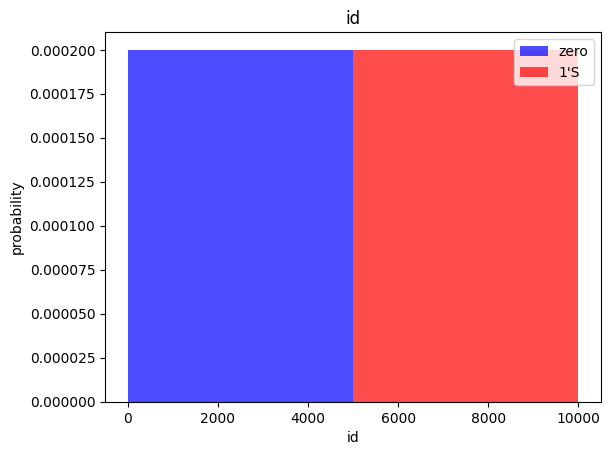

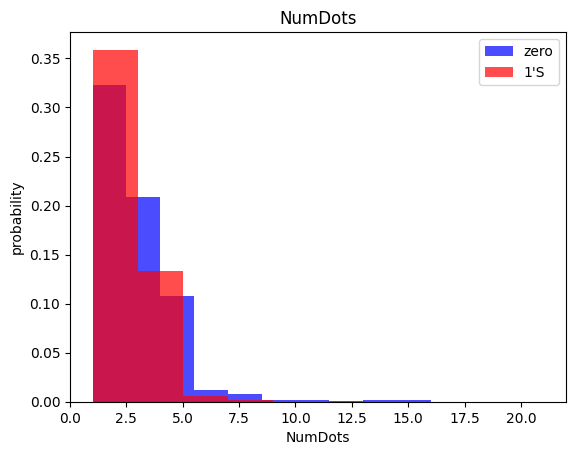

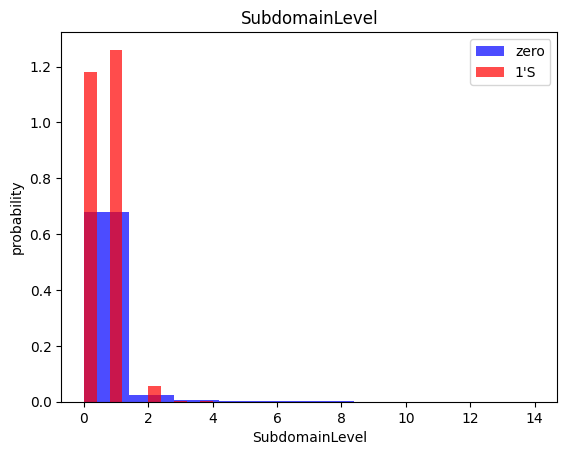

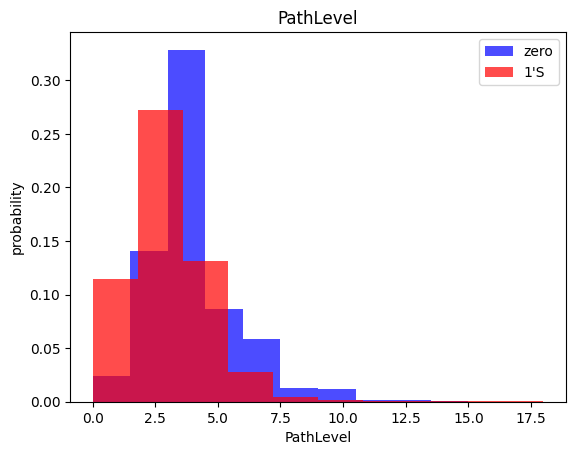

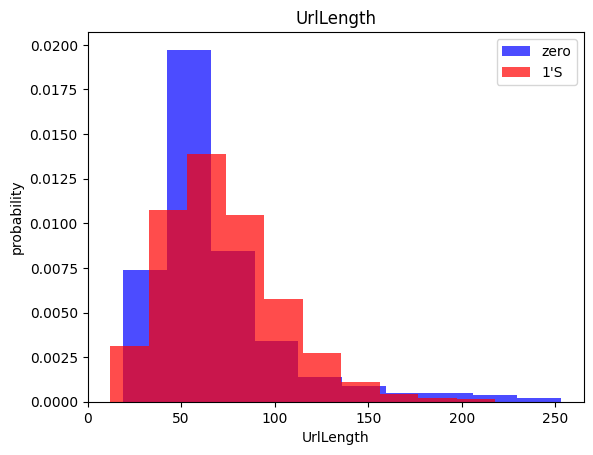

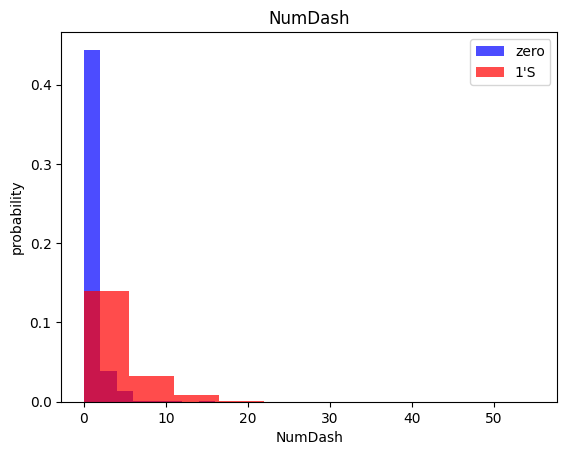

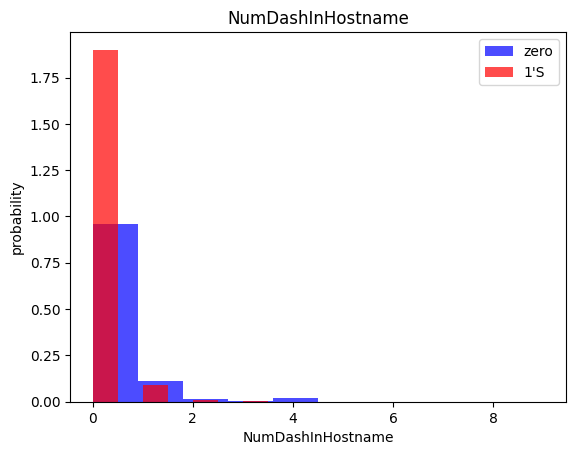

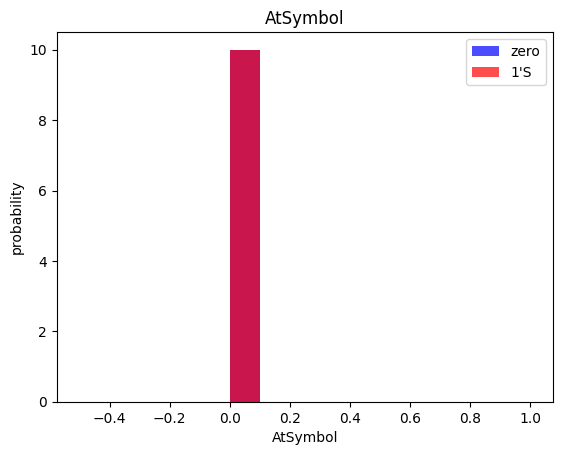

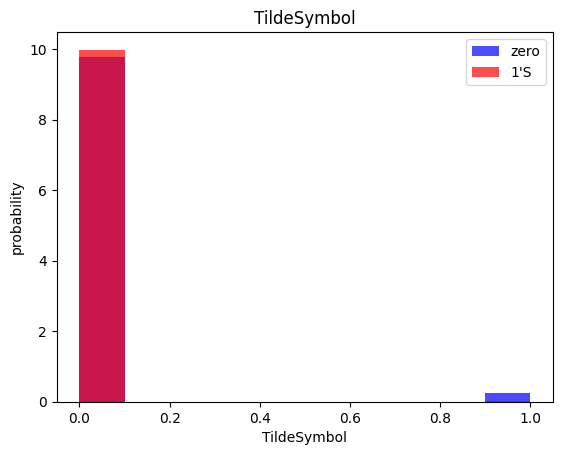

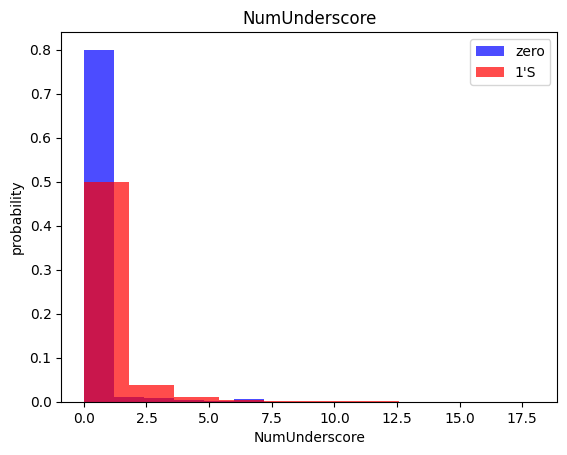

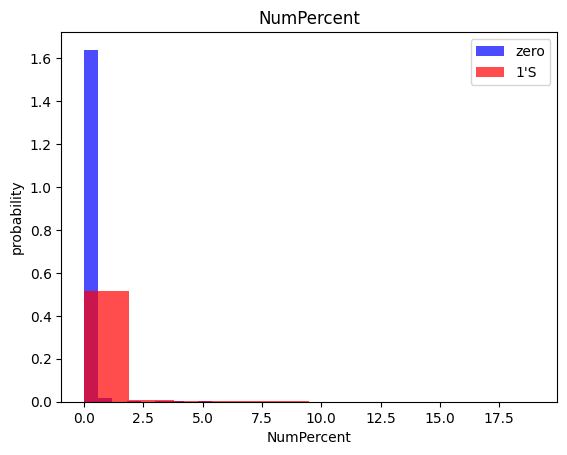

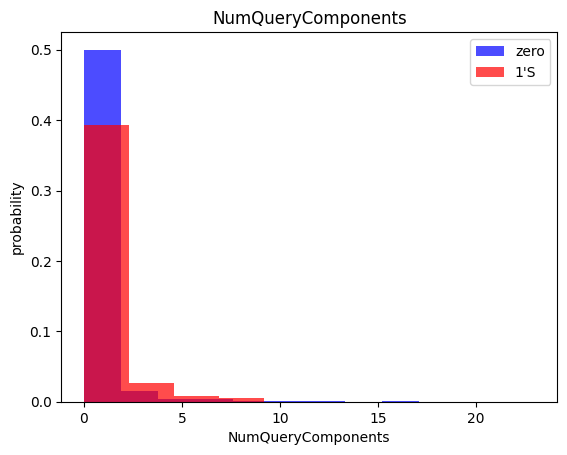

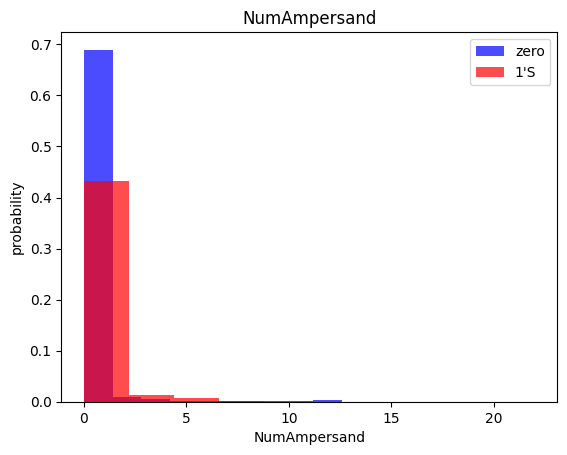

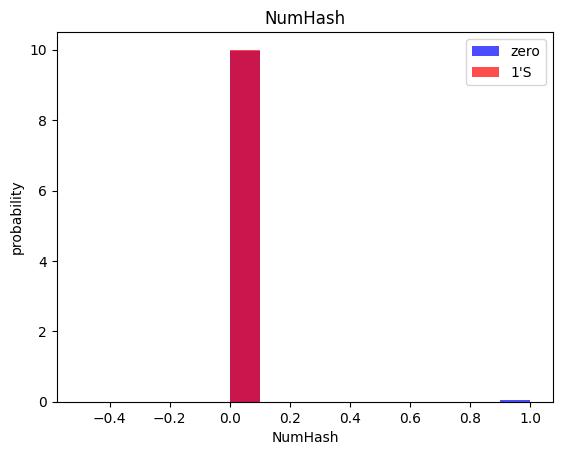

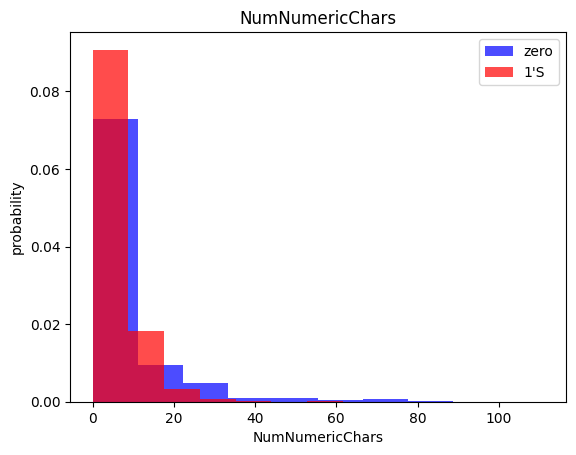

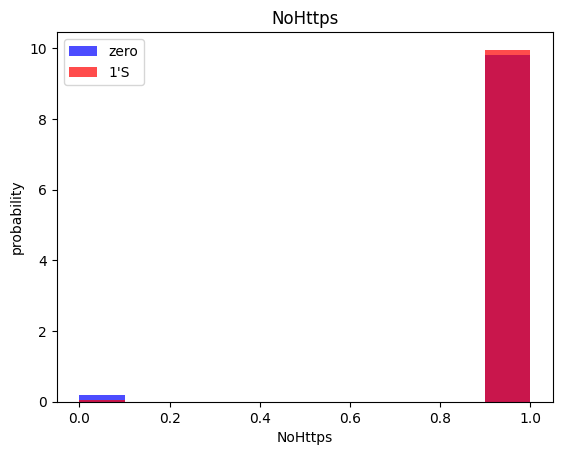

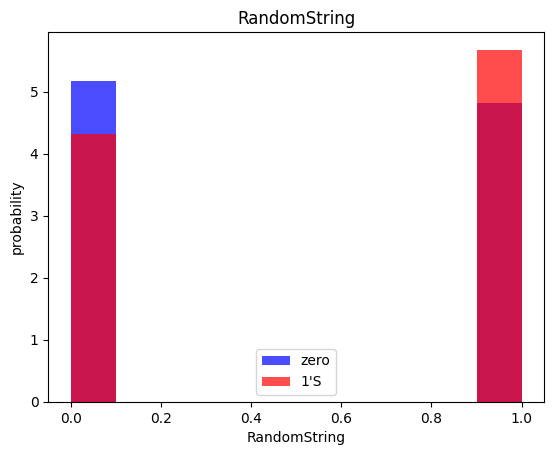

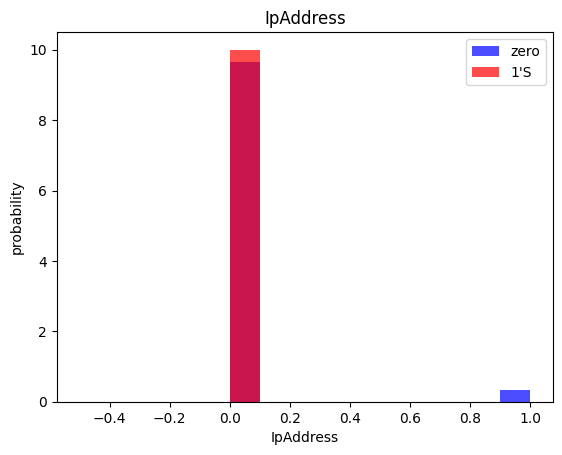

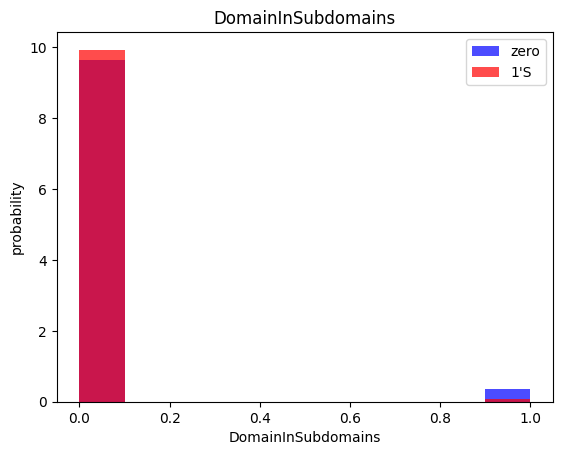

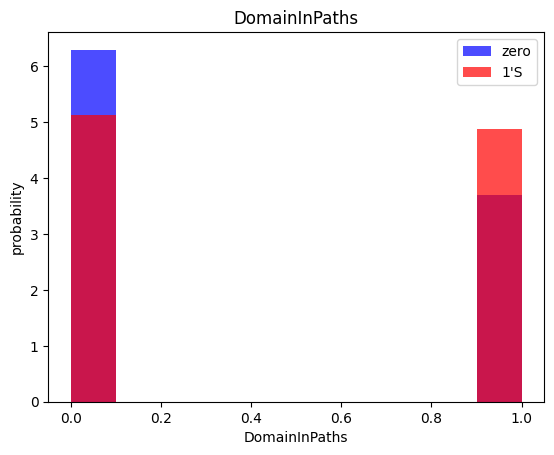

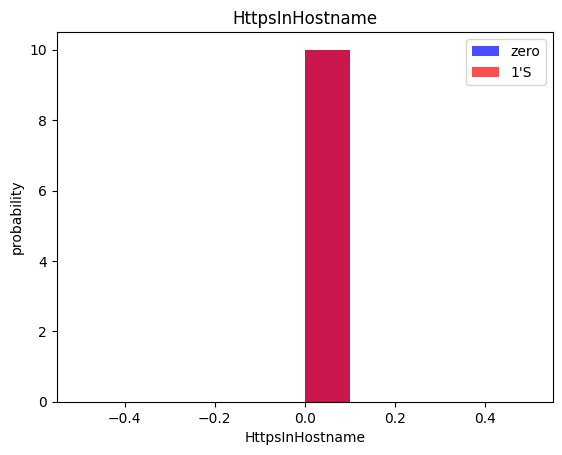

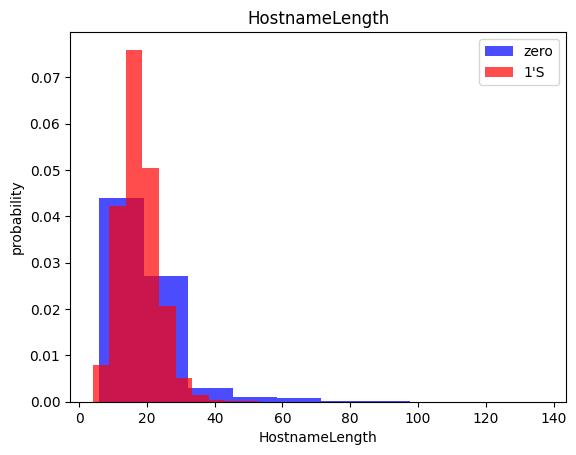

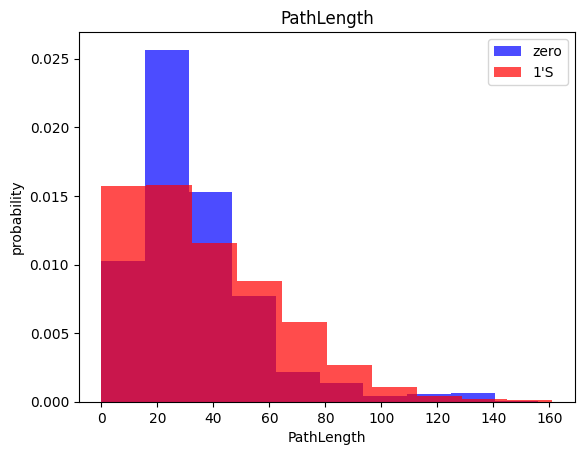

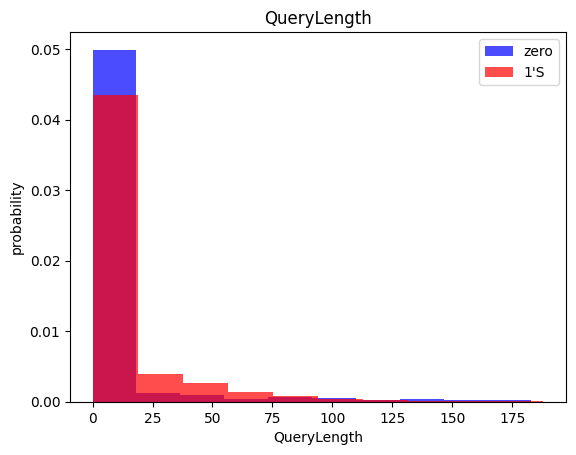

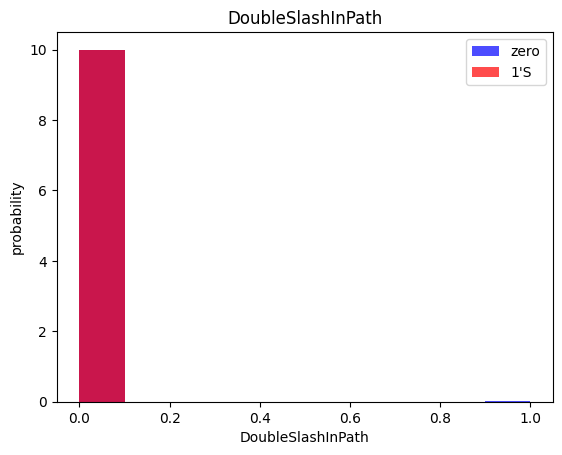

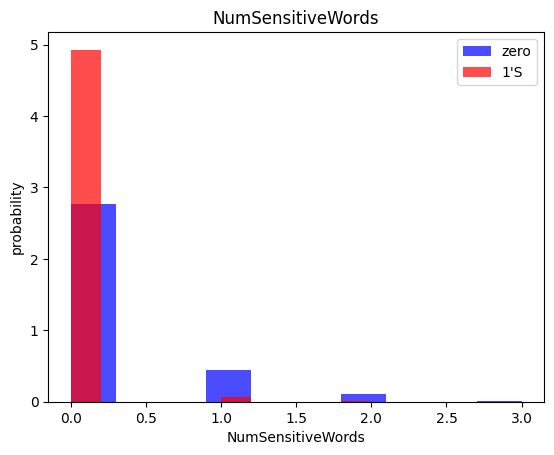

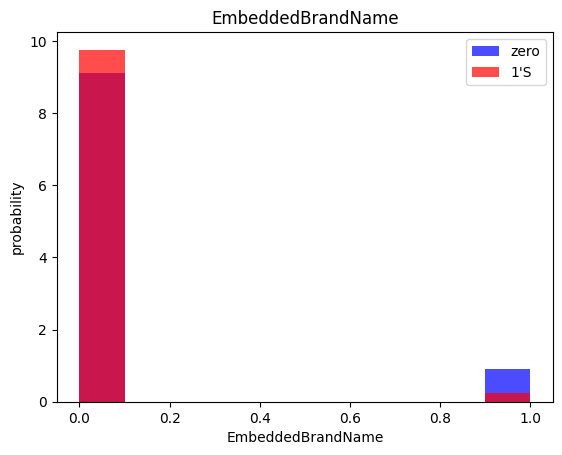

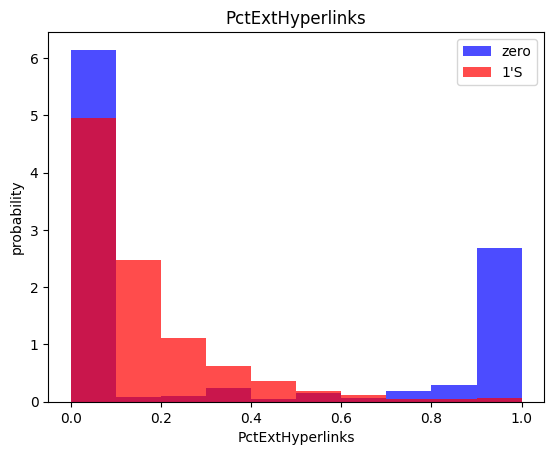

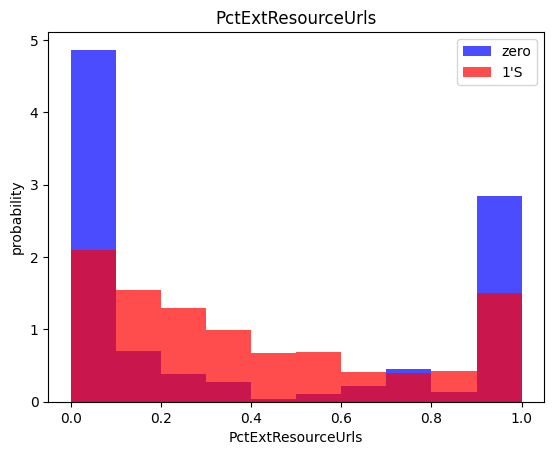

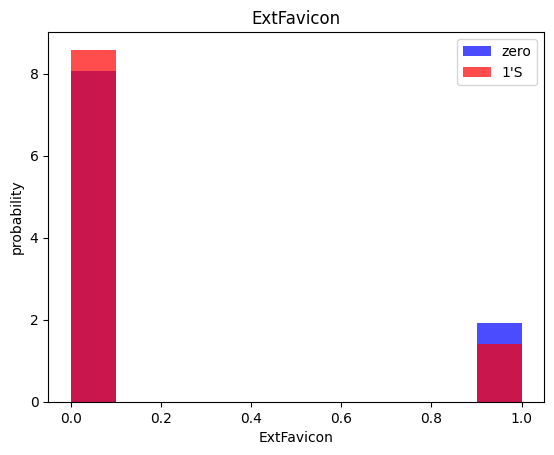

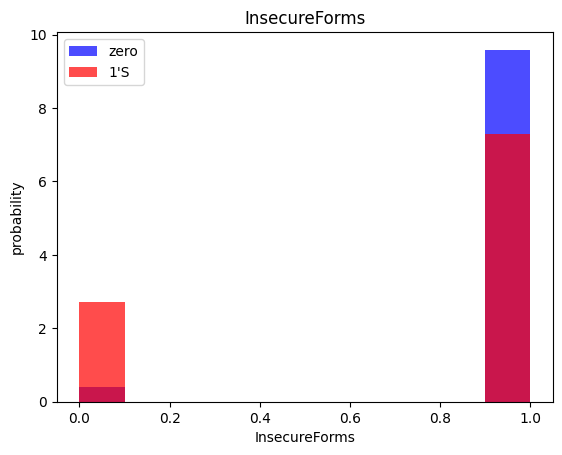

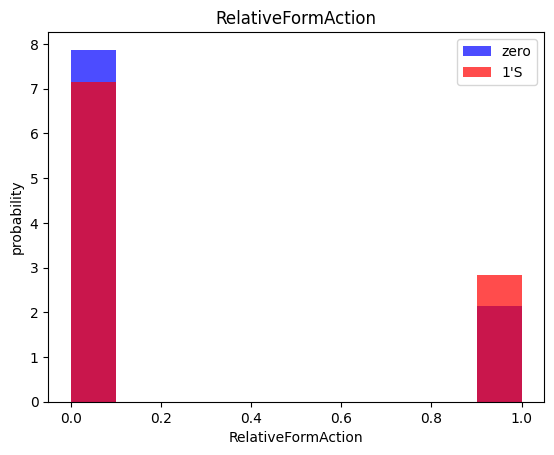

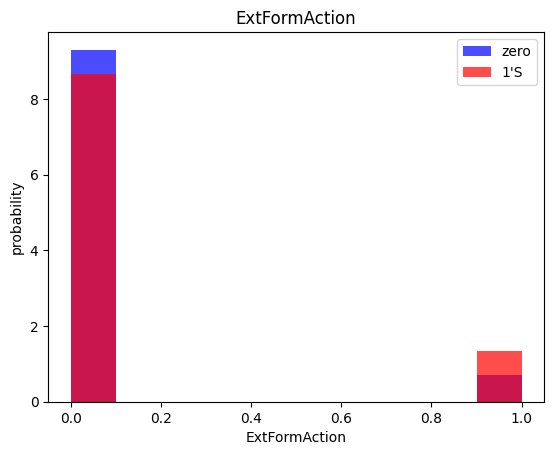

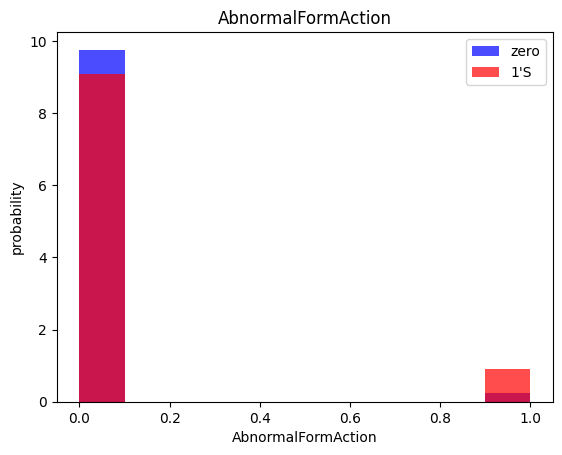

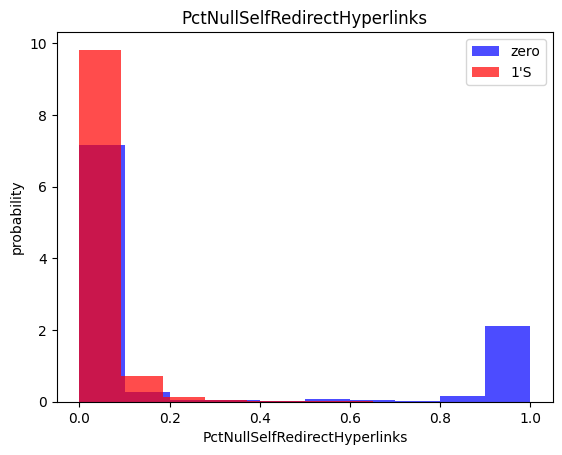

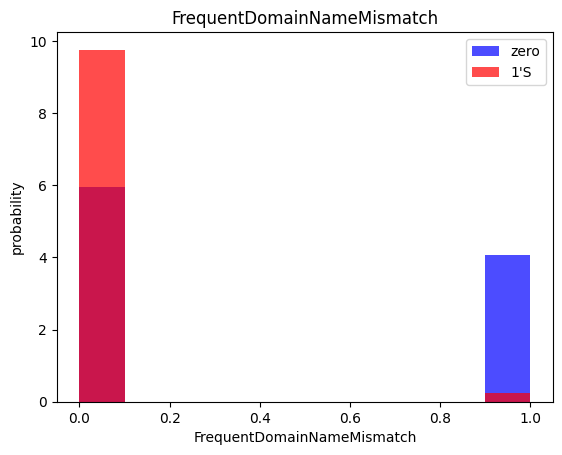

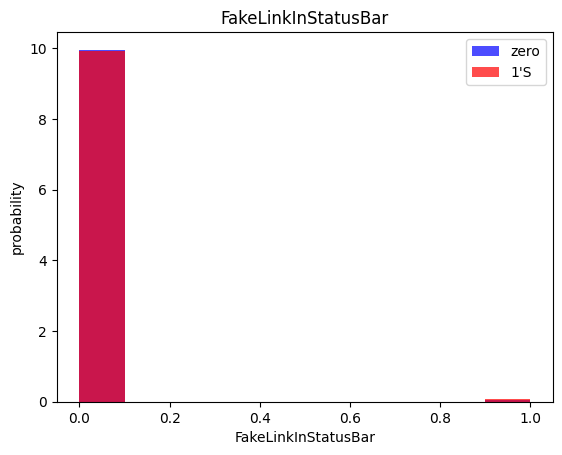

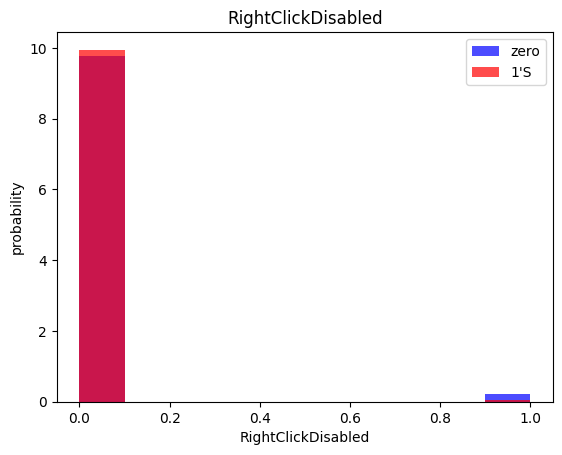

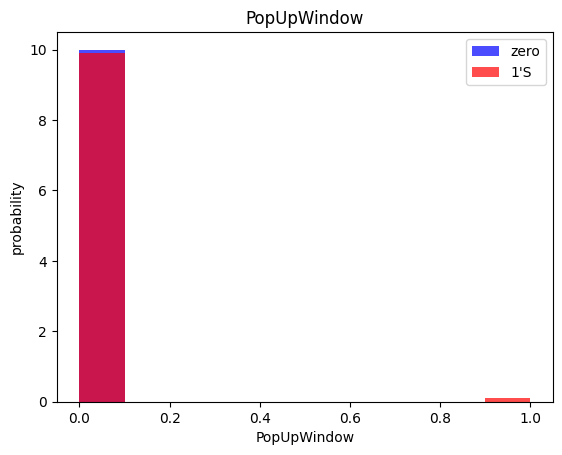

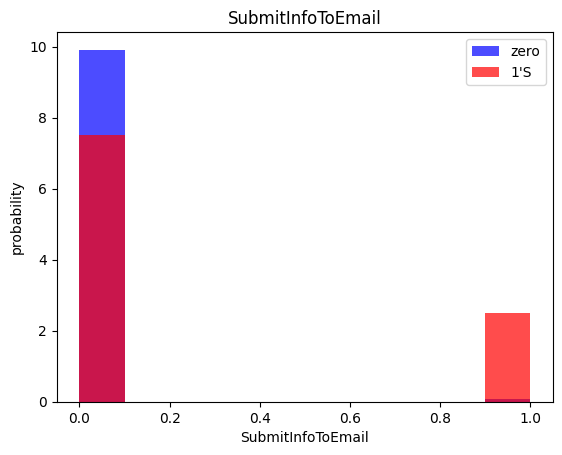

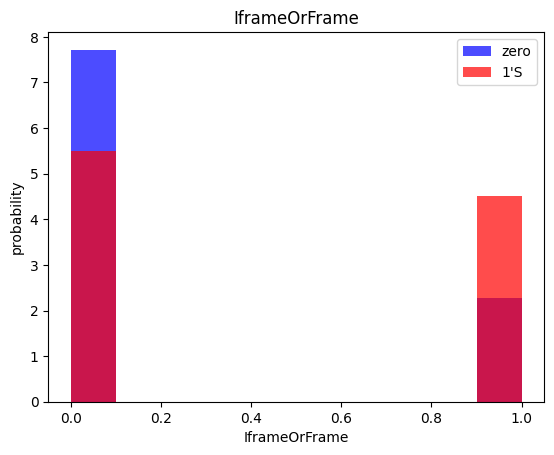

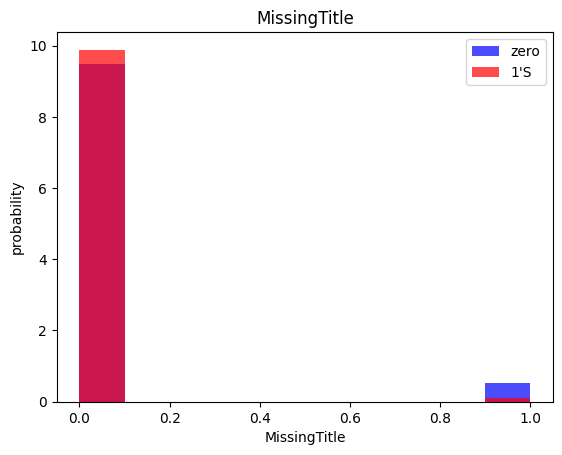

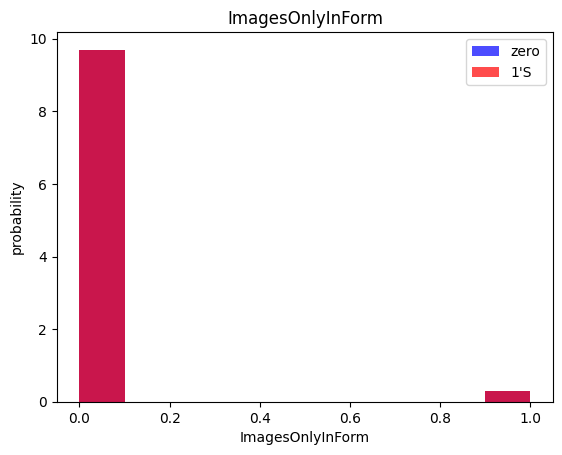

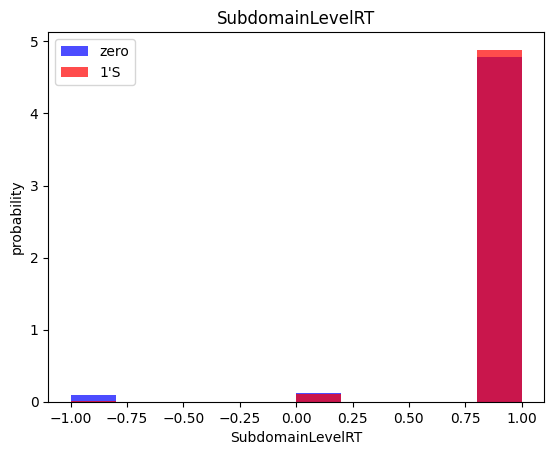

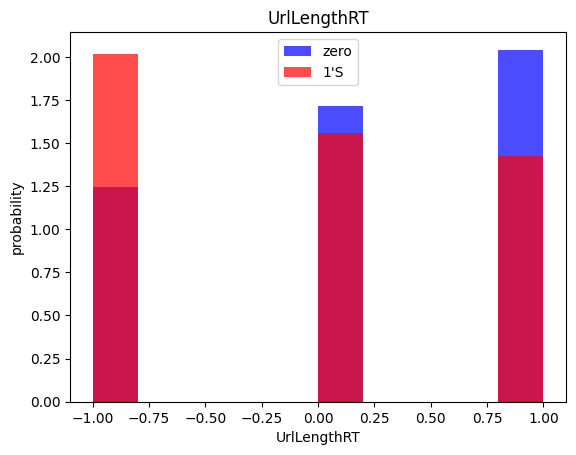

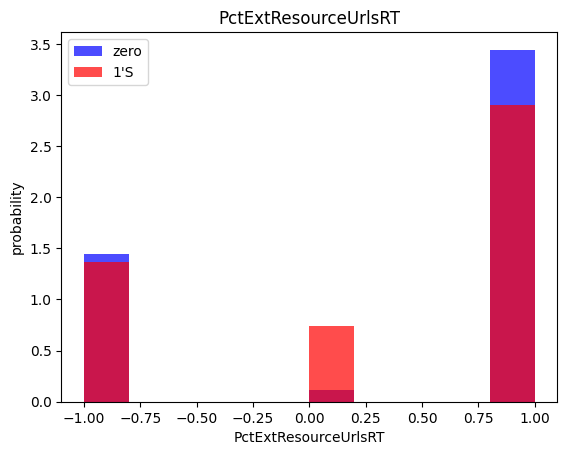

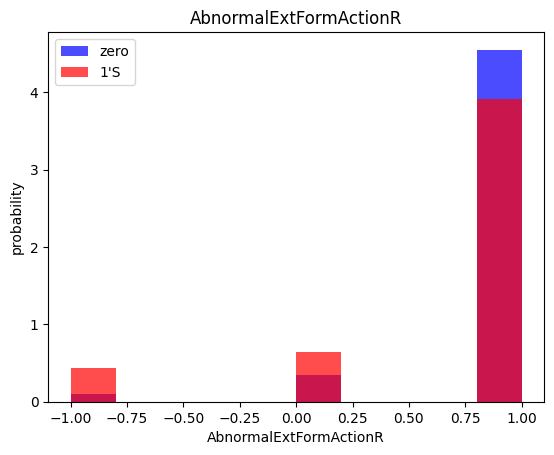

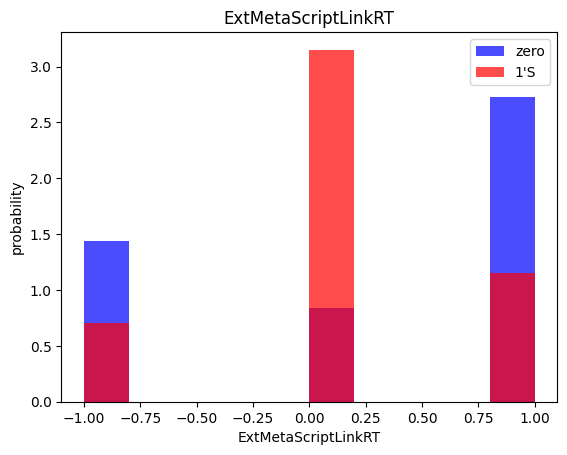

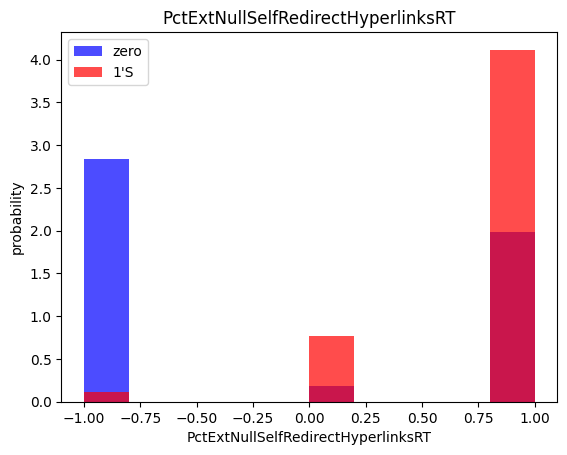

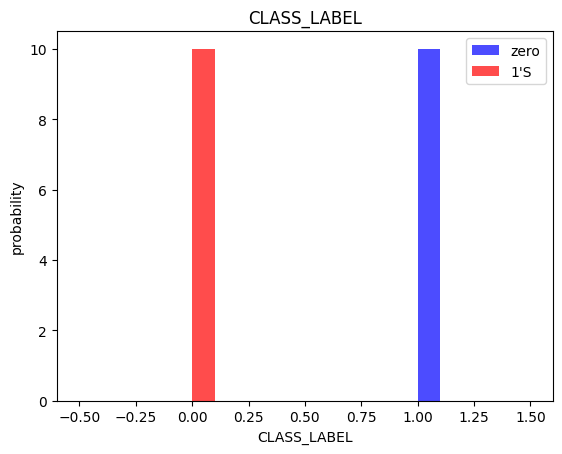

In [220]:
for labels in df [:-1]:
  plt.hist(df[df["CLASS_LABEL"]==1][labels], color = "blue", label = "zero" , alpha = 0.7 ,density= True)
  plt.hist(df[df["CLASS_LABEL"]==0][labels], color = "red", label = "1'S" , alpha = 0.7 ,density= True)
  plt.title (labels)
  plt.xlabel (labels)
  plt.ylabel("probability")
  plt.legend()
  plt.show()
     

In [ ]:

color_list = ['blue' if i =="Normal" else 'green' for i in df.loc[:,'CLASS_LABEL']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'CLASS_LABEL'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.7,
                                       s = 200,
                                       marker = "*",
                                       edgecolor= "black")
plt.show()

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

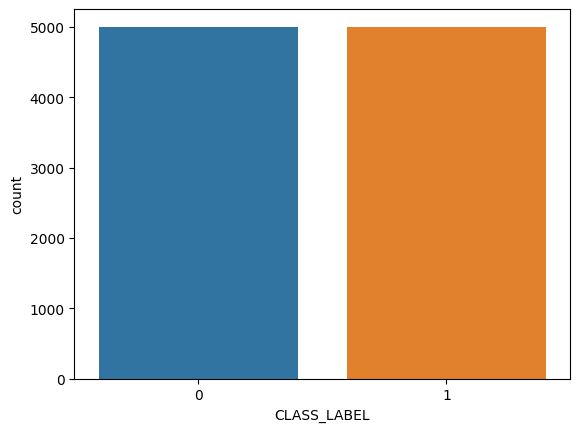

In [221]:
sns.countplot(x="CLASS_LABEL", data=df )

df["CLASS_LABEL"].value_counts()


# ***Train , validation , test dataset***

In [166]:
train, valid, test=np.split(df.sample(frac=1) , [int(0.6*len(df)) , int(0.8* len(df))])


# scale the dataset so its becomes the same as the mean and S.D of other **columns** **bold text**

# **Add over sampler ** (Take more of the less class)

In [101]:
def scale_dataset(dataframe , oversample = False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x=scaler.fit_transform (x)

  if oversample:
    ros=RandomOverSampler()
    x,y = ros.fit_resample(x,y)

#df= np.hstack((x,y)) (since y is a one directional object we'll call numpy.reshape)
  df=np.hstack((x, np.reshape(y ,(-1,1))))
  return df, x , y 

In [82]:
print(len(train[train["CLASS_LABEL"]==1]))
print(len(train[train["CLASS_LABEL"]==0]))

3028
2972


In [106]:
train, x_train ,y_train = scale_dataset( train , oversample= True)

In [95]:
len(y_train)

6056

In [99]:
sum(y_train==1)


3028

In [98]:
sum(y_train==0)

3028

# **They are evenly re-balanced .**

In [149]:
train, x_train ,y_train = scale_dataset( train , oversample= True)
valid, x_valid ,y_valid = scale_dataset( valid , oversample= False)
test, x_test ,y_test = scale_dataset( test , oversample= False)

# USING VARRIOUS  MODELS 



1.   KNN  = (K.Nearest -Neighbours)




In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [160]:
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit( x_train , y_train) 

KNeighborsClassifier()

In [151]:
y_pred = knn_model.predict(x_test)


In [154]:
y_pred


array([1, 0, 1, ..., 1, 1, 0])

In [155]:
y_test

array([1, 0, 1, ..., 1, 1, 0])

In [161]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1026
           1       0.97      0.97      0.97       974

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



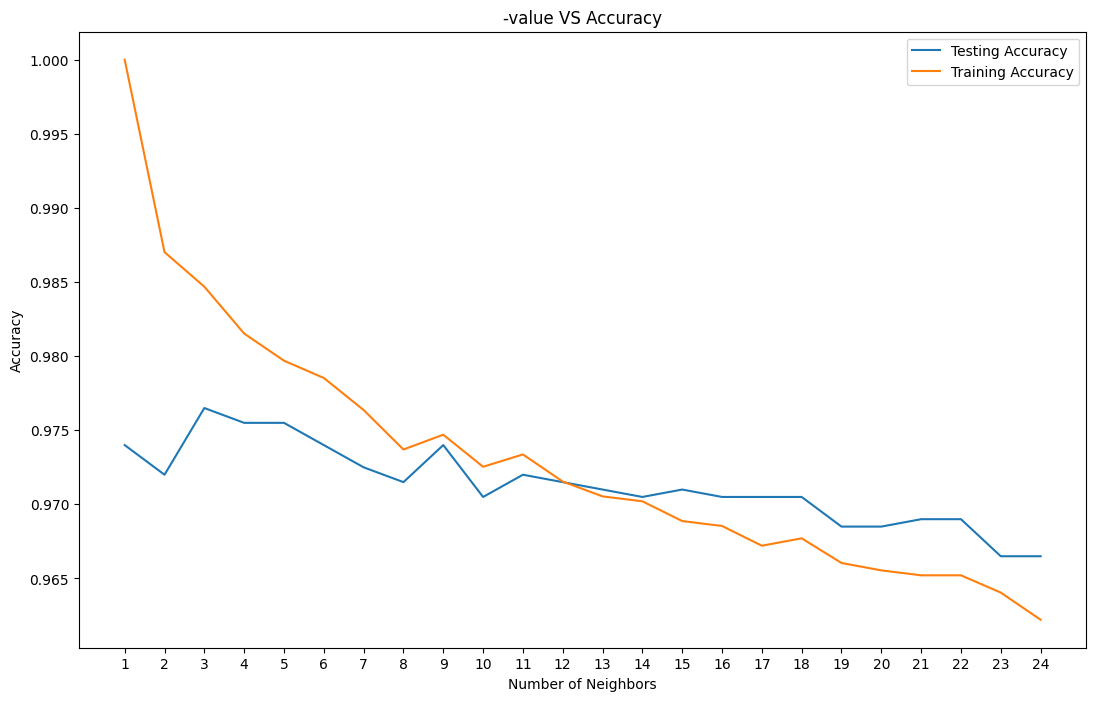

Best accuracy is 0.9765 with K = 3


In [211]:
#Model complexity
n_neighbors = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(n_neighbors):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(n_neighbors)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

# **Naive Bayes' Model**

```
## This is formatted as code
```



In [168]:
from sklearn.naive_bayes import GaussianNB

In [188]:
nb_model = GaussianNB()



In [189]:
nb_model.fit(x_train , y_train)

GaussianNB()

In [190]:
nb_model=nb_model.fit(x_train , y_train)

In [179]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1026
           1       0.49      1.00      0.66       974

    accuracy                           0.49      2000
   macro avg       0.24      0.50      0.33      2000
weighted avg       0.24      0.49      0.32      2000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#logistic Regression 

# **logistic Regression **

In [180]:
from sklearn.linear_model import LogisticRegression

In [184]:
LR_model = LogisticRegression()


In [185]:

LR_model.fit(x_train , y_train)

LogisticRegression()

In [186]:

LR_model=LR_model.fit(x_train , y_train) 

In [187]:
y_pred = LR_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1026
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



***#SUPPORT VECTOR MACHINES (SVM)***

In [ ]:
#SUPPORT VECTOR MACHINES (SVM)

In [191]:
from sklearn.svm import SVC

In [192]:
svn_model = SVC()

In [193]:
svn_model.fit(x_train , y_train) 

SVC()

In [194]:
svn_model = svn_model.fit(x_train , y_train) 

In [195]:
y_pred = svn_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1026
           1       0.99      1.00      1.00       974

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
#Neural Net

# **#Neural Net**

In [197]:
import tensorflow as tf

In [200]:
nn_model = tf.keras.Sequential([tf.keras.layers.Dense(32 , activation= "relu", input_shape= (10,)),
                                tf.keras.layers.Dense(32 , activation= "relu"), 
                                tf.keras.layers.Dense(1 , activation= "sigmoid"), ])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001) , loss = "binary_crossentropy",
                 metrics = ["accuracy"])

In [ ]:
#TBC